## study_gan.ipynb
#### [GAN 강의자료_Tensorflow](https://www.tensorflow.org/tutorials/generative/dcgan)
#### [자세한 GAN 참조](http://introtodeeplearning.com/)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape, type(x_train), x_train.ndim, y_train.shape, type(y_train), y_train.ndim

((60000, 28, 28), numpy.ndarray, 3, (60000,), numpy.ndarray, 1)

13182
5


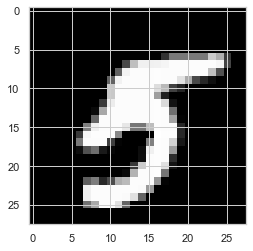

In [4]:
i = np.random.randint(0, 60000)  # 0 ~ 59,999
print(i)
print(y_train[i])
plt.imshow(x_train[i], cmap="gray")

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train[0].min(), x_train[0].max()

(0.0, 255.0)

In [8]:
x_train = x_train / 255

In [9]:
def build_generator():
    network = tf.keras.Sequential()

    network.add(layers.Dense(7 * 7 * 256, use_bias = False, input_shape = (100, )))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    network.add(layers.Reshape((7, 7, 256)))

    # 7 * 7 * 128
    network.add(layers.Conv2DTranspose(128, (5, 5), padding="same", use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 14 * 14 * 64
    network.add(layers.Conv2DTranspose(64, (5, 5), strides = (2, 2), padding="same", use_bias=False))
    network.add(layers.BatchNormalization())
    network.add(layers.LeakyReLU())

    # 28 * 28 * 1
    network.add(layers.Conv2DTranspose(1, (5, 5), strides = (2, 2), padding="same", use_bias=False, activation="tanh"))

    network.summary()

    return network

In [10]:
generator = build_generator()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12544)             1254400   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 12544)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 128)         0

In [11]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.9445679 ,  0.00573999, -2.2894964 , -0.14856796,  0.12856632,
        -0.4627313 ,  0.22094542, -0.19891767, -0.04296663,  0.88845426,
         0.14457247, -0.535485  , -0.35582712, -0.7178518 , -1.439871  ,
         0.64998156,  0.74986637,  0.65200746,  0.92611766,  1.142022  ,
         0.3368708 , -1.2096988 ,  0.85515934, -1.3257027 , -0.48879477,
        -1.0992569 , -0.67068875,  1.2012986 , -0.7121845 , -1.6063509 ,
        -1.1735637 , -0.6086773 ,  0.63995564,  0.5600207 , -0.52242154,
        -0.04652287,  0.22905809, -0.9907001 , -1.4558995 , -0.8527848 ,
        -1.0980927 ,  2.054103  ,  0.35635093, -1.0636712 , -1.0599928 ,
         0.46738783, -0.8391113 ,  1.4204376 , -0.03286041, -0.01070282,
         0.67000645,  0.78626674, -1.2218077 ,  0.2805504 ,  0.7555491 ,
        -0.24002893,  1.2980036 , -2.3613431 ,  2.155344  , -0.43047014,
         0.47797307, -1.0214789 ,  0.32789308,  1.5924382 ,  0.8047664 ,
 

(1, 28, 28, 1)


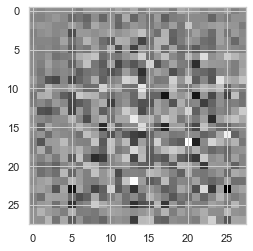

In [12]:
generated_image = generator(noise, training = False)
print(generated_image.shape)
plt.imshow(generated_image[0,:, :,0], cmap="gray")

In [13]:
def build_discriminator():
    network = tf.keras.Sequential()

    # 14 * 14 * 64
    network.add(layers.Conv2D(64, (5, 5), strides = (2, 2), padding="same", input_shape = [28, 28, 1]))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))

    # 7 * 7 * 128
    network.add(layers.Conv2D(128, (5, 5), strides = (2, 2), padding="same"))
    network.add(layers.LeakyReLU())
    network.add(layers.Dropout(0.3))    

    network.add(layers.Flatten())
    network.add(layers.Dense(1))

    network.summary()

    return network

In [14]:
discriminator = build_discriminator()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)             

In [15]:
discriminator(generated_image, training=False)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.0020461]], dtype=float32)>

In [16]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [17]:
def discriminator_loss(expected_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(expected_output), expected_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [18]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [19]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001)

In [20]:
epochs = 100
noise_dim = 100
num_images_to_generate = 16
batch_size = 256

In [21]:
@tf.function
def train_steps(images):
    noise = tf.random.normal([batch_size, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training = True)
        
        expected_output = discriminator(images, training =True)
        fake_output = discriminator(generated_images, training = True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(expected_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients( zip(gradients_of_generator, generator.trainable_variables) )
    discriminator_optimizer.apply_gradients( zip(gradients_of_discriminator, discriminator.trainable_variables) )



In [22]:
def train(dataset, epochs, test_images):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_steps(image_batch)

        print("Epoch: ", epoch + 1)
        generated_images = generator(test_images, training = False)
        fig = plt.figure(figsize = (10, 10))
        for i in range(generated_images.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow(generated_images[i, :, :, 0], cmap="gray")
            plt.axis("off")
        plt.show()

        

In [23]:
test_images = tf.random.normal([num_images_to_generate, noise_dim])

In [24]:
test_images.shape, type(test_images), test_images.ndim, test_images

(TensorShape([16, 100]),
 tensorflow.python.framework.ops.EagerTensor,
 2,
 <tf.Tensor: shape=(16, 100), dtype=float32, numpy=
 array([[-0.46558687, -0.8853193 ,  0.5567153 , ...,  1.5670058 ,
          0.7742535 , -0.64191455],
        [-0.0171971 ,  1.8775833 , -0.178351  , ...,  0.4418595 ,
          0.14926219, -0.3589757 ],
        [-0.72230524,  0.21486485, -0.7148829 , ...,  1.5838332 ,
         -0.16100903, -0.844975  ],
        ...,
        [-0.40989372,  0.02419301,  1.438919  , ..., -1.1402553 ,
         -1.6447238 , -0.26741475],
        [-0.9391828 ,  0.4069426 ,  1.4720547 , ...,  1.1128039 ,
         -0.6470569 ,  0.01342191],
        [ 0.15700889, -1.6642551 , -1.1292152 , ..., -0.92557395,
          0.5251796 , -1.1074854 ]], dtype=float32)>)

In [25]:
x_train.shape, type(x_train)

((60000, 28, 28, 1), numpy.ndarray)

In [26]:
x_train = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)

In [27]:
type(x_train), x_train

(tensorflow.python.data.ops.dataset_ops.BatchDataset,
 <BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>)

Epoch:  1


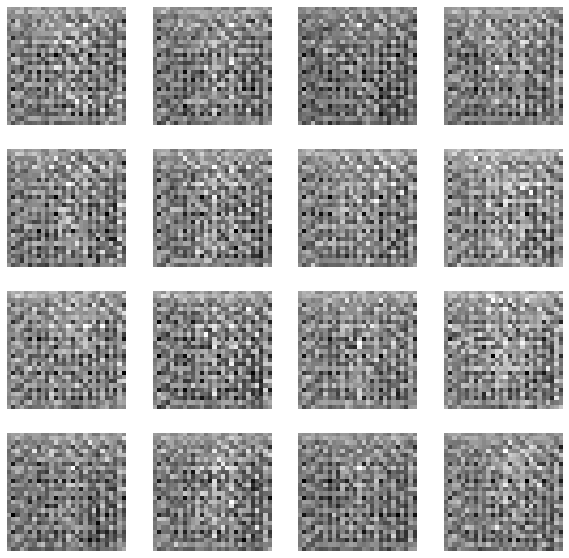

Epoch:  2


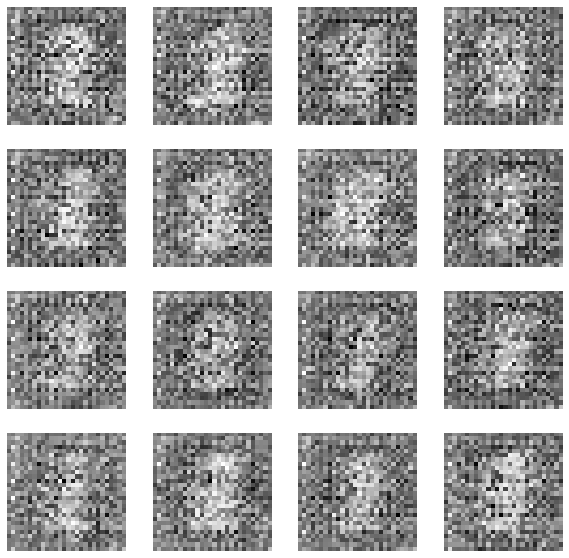

Epoch:  3


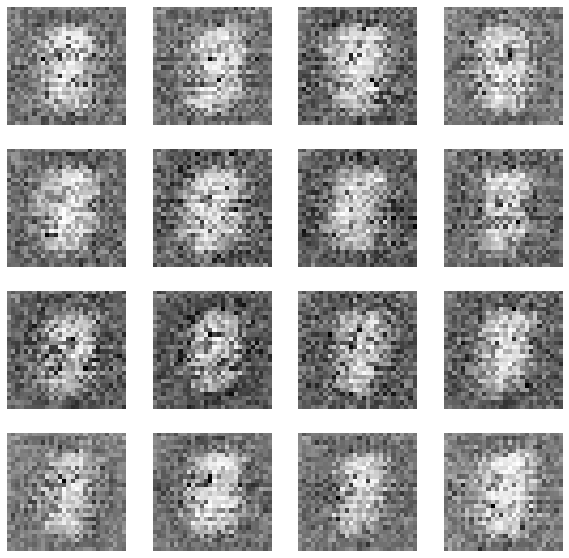

Epoch:  4


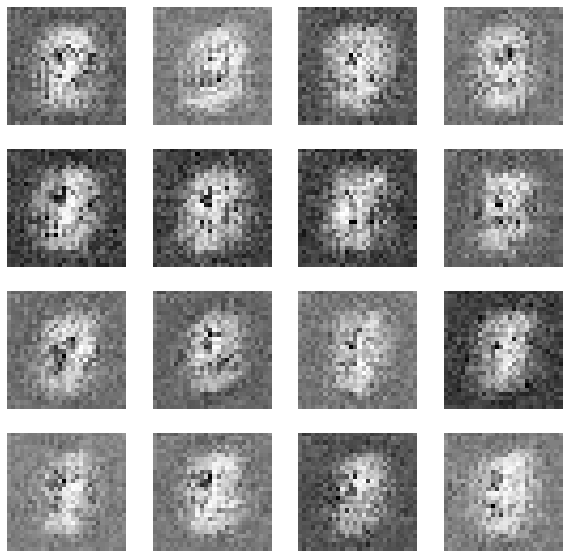

Epoch:  5


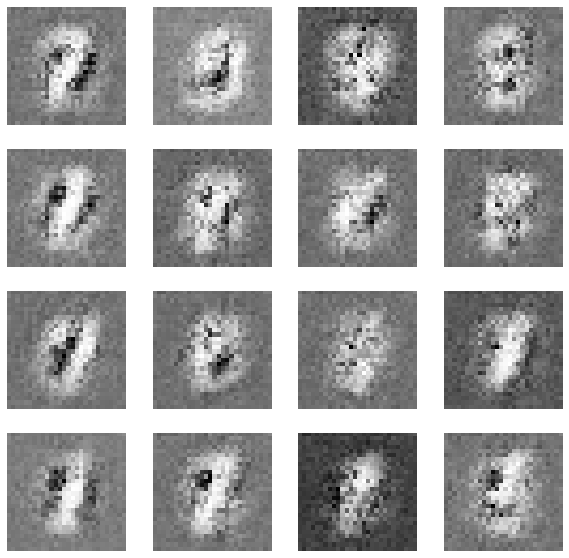

Epoch:  6


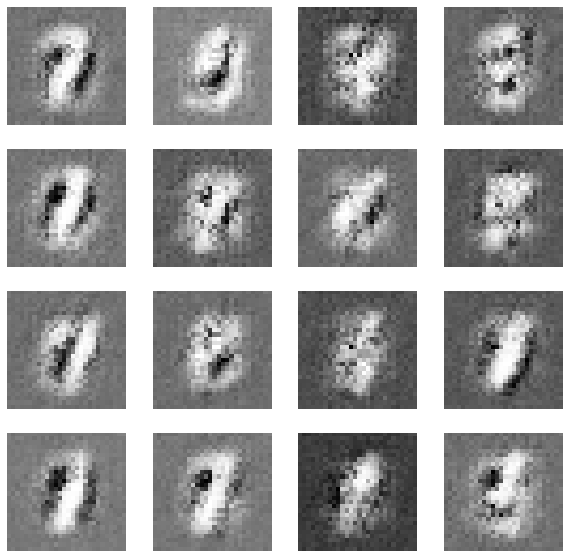

Epoch:  7


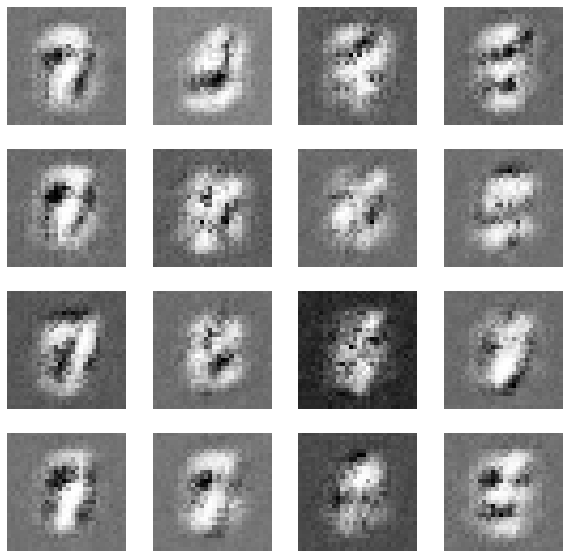

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "/Users/sangjulee1/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-05f69a864424>", line 1, in <module>
    train(x_train, epochs, test_images)
  File "<ipython-input-22-c31c8b0fdf42>", line 4, in train
    train_steps(image_batch)
  File "/Users/sangjulee1/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "/Users/sangjulee1/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py", line 855, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/Users/sangjulee1/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py", line 2

KeyboardInterrupt: 

In [29]:
train(x_train, epochs, test_images)